# Facemask_Detection

### Importing Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2

### Preprocessing the training set

### Preprocessing the test set

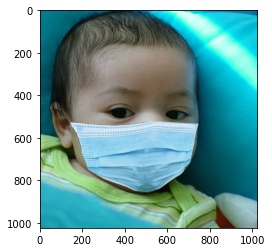

In [2]:
Datadirectory = "dataset/"
Classes = ["correct_mask" , "incorrect"]
for i in Classes:
    path = os.path.join(Datadirectory , i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array , cv2.COLOR_BGR2RGB))
        plt.show()
        break;
    break;

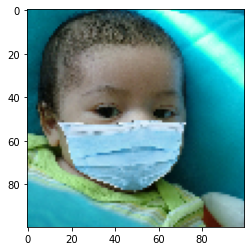

In [3]:
new_array = cv2.resize(img_array , (100,100))
plt.imshow(cv2.cvtColor(new_array , cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'correct_mask': 0, 'incorrect': 1}
['correct_mask', 'incorrect']
[0, 1]


In [5]:
img_size=100
data=[]
target=[]

def create():
    for category in categories:
        folder_path=os.path.join(data_path,category)
        img_names=os.listdir(folder_path)

        for img_name in img_names:
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)

            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
                resized=cv2.resize(gray,(img_size,img_size))
                data.append(resized)
                target.append(label_dict[category])

            except Exception as e:
                print('Exception:',e)

In [6]:
create()

In [7]:
print(len(data))

1950


In [8]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

In [9]:
from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

### Building CNN

In [10]:
data.shape

(1950, 100, 100, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


new_cnn=Sequential()


new_cnn.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
new_cnn.add(Activation('relu'))
new_cnn.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers


new_cnn.add(Conv2D(100,(3,3)))
new_cnn.add(Activation('relu'))
new_cnn.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers


new_cnn.add(Flatten())
new_cnn.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer


new_cnn.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons


new_cnn.add(Dense(1,activation='sigmoid'))
#The Final layer with two outputs for two categories


new_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [13]:
new_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

### Training CNN on Training set

In [14]:
hist = new_cnn.fit(train_data,train_target,epochs=20,validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 51s 1s/step - loss: 0.6596 - accuracy: 0.6054 - val_loss: 0.4987 - val_accuracy: 0.7407
Epoch 2/20
44/44 [==============================] - 47s 1s/step - loss: 0.2987 - accuracy: 0.8768 - val_loss: 0.1535 - val_accuracy: 0.9288
Epoch 3/20
44/44 [==============================] - 50s 1s/step - loss: 0.0838 - accuracy: 0.9694 - val_loss: 0.0705 - val_accuracy: 0.9744
Epoch 4/20
44/44 [==============================] - 49s 1s/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0504 - val_accuracy: 0.9772
Epoch 5/20
44/44 [==============================] - 49s 1s/step - loss: 0.0635 - accuracy: 0.9772 - val_loss: 0.0735 - val_accuracy: 0.9744
Epoch 6/20
44/44 [==============================] - 49s 1s/step - loss: 0.0320 - accuracy: 0.9886 - val_loss: 0.0227 - val_accuracy: 0.9943
Epoch 7/20
44/44 [==============================] - 49s 1s/step - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.0269 - val_accuracy: 0.9858
Epoch 8/20
44/44 [==

In [15]:
from keras.models import load_model
new_cnn.save('final_model.h5')

### Visualizing results

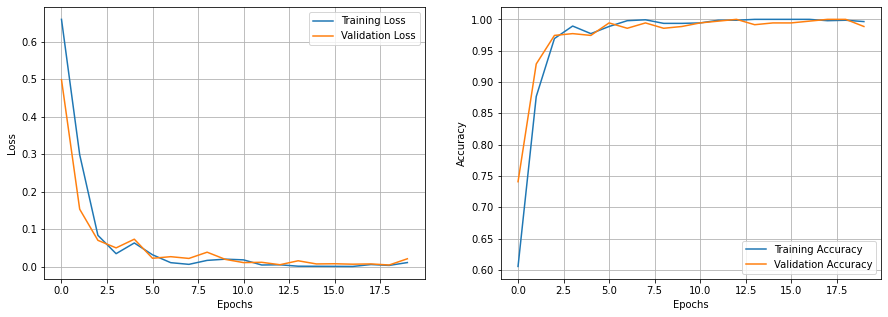

In [16]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

## Checking model for Predictions

In [17]:
img = cv2.imread('women.jpg')

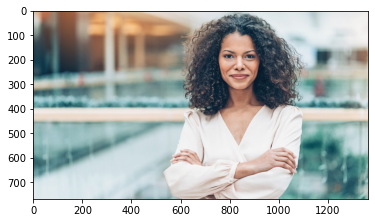

In [18]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [19]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)    
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))

In [20]:
Predictions = new_cnn.predict(reshaped)
print(Predictions)

[[0.23512337]]


In [21]:
img2 = cv2.imread('women2.jpeg')

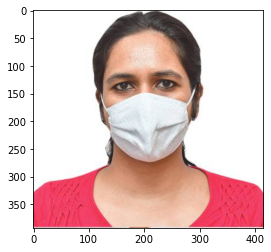

In [22]:
plt.imshow(cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB))

In [23]:
gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)    
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))

In [24]:
Predictions = new_cnn.predict(reshaped)
print(Predictions)

[[0.9918261]]


## Face Detection

In [25]:
img3 = cv2.imread('women3.jfif')

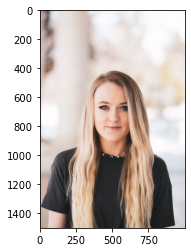

In [26]:
plt.imshow(cv2.cvtColor(img3 , cv2.COLOR_BGR2RGB))

In [27]:
face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [28]:
gray = cv2.cvtColor(img3 , cv2.COLOR_BGR2GRAY)

In [29]:
gray.shape

(1500, 1000)

In [30]:
faces = face.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img3[y:y+h , x:x+w]
        cv2.rectangle(img3,(x,y),(x+w,y+h),(0,0,255),2)       
        face2 = face.detectMultiScale(roi_gray)
        if(len(face2) == 0):
            print("No Face")
        else:
            for (ex,ey,ew,eh) in face2:
                face_roi = roi_color[ey:ey+eh,ex:ex+ew]

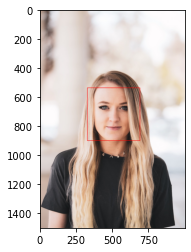

In [31]:
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))

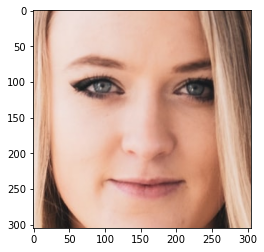

In [32]:
plt.imshow(cv2.cvtColor(face_roi , cv2.COLOR_BGR2RGB))

In [33]:
gray=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)    
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))

In [34]:
predictions = new_cnn.predict(reshaped)

In [35]:
print(predictions)

[[0.999977]]


# RealTime FaceMask Detector

In [36]:
from keras.models import load_model
model = load_model('final_model.h5')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [37]:
while(True):

    ret,img=source.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
        if(result > 0.5):
            label = 1
        else:
            label = 0
#         label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()
source.release()